In [3]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [4]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df = pd.read_csv('twitter_sentiment_dataset.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
#df = df[:-108909]

In [5]:
# Importing the dataset
DATASET_COLUMNS=['target','ids','date','flag','user','text']
DATASET_ENCODING = "ISO-8859-1"
df1 = pd.read_csv('Project_Data.csv', encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
#df = df[:-108909]

In [9]:
# Checking for NULL values overall
np.sum(df1.isnull().any(axis=1))

123

In [7]:
# Check null value for each column
df1.fillna(method='ffill')

,target,ids,date,flag,user,text
0,0.0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0.0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0.0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0.0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0.0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1048571,4.0,1960186342,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Madelinedugganx,My GrandMa is making Dinenr with my Mum
1048572,4.0,1960186409,Fri May 29 07:33:43 PDT 2009,NO_QUERY,OffRoad_Dude,Mid-morning snack time... A bowl of cheese noo...
1048573,4.0,1960186429,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@ShaDeLa same here say it like from the Termi...
1048574,4.0,1960186445,Fri May 29 07:33:44 PDT 2009,NO_QUERY,Falchion,@DestinyHope92 im great thaanks wbuu?


In [17]:
# Replace with previous value in that case for the column

In [18]:
# Remove unwanted columns - username

In [14]:
print('Count of columns in the data is:  ', len(df.columns))
print('Count of rows in the data is:  ', len(df))

Count of columns in the data is:   6
Count of rows in the data is:   1600000


In [6]:
df['target'].unique() # 4 is positive and 0 negative

array([0, 4], dtype=int64)

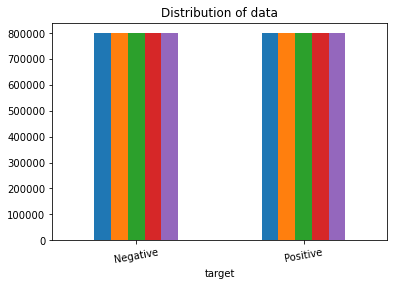

In [9]:
ax = df.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=10)
text, sentiment = list(df['text']), list(df['target'])


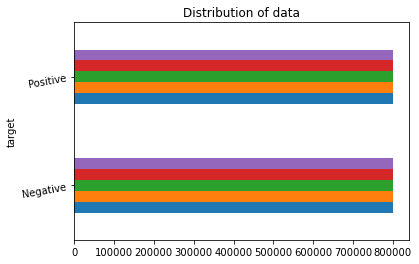

In [10]:
ax = df.groupby('target').count().plot(kind='barh', title='Distribution of data',legend=False)
ax.set_yticklabels(['Negative','Positive'], rotation=10)
text, sentiment = list(df['text']), list(df['target'])


In [10]:
df.groupby('flag').count()

,target,ids,date,user,text
flag,,,,,
NO_QUERY,1600000,1600000,1600000,1600000,1600000
